In [27]:
import pm4py

import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *
import event_log_transformer

In [2]:
file_path = '../../../data/DomesticDeclarations.xes'
event_log = pm4py.read_xes(file_path)

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

In [3]:
event_log

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
...,...,...,...,...,...,...,...,...,...,...
56432,st_step 138363_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-12-29 17:50:14+00:00,EMPLOYEE,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56433,st_step 138361_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-12-29 17:56:13+00:00,ADMINISTRATION,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56434,st_step 138362_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-01-03 08:55:52+00:00,SUPERVISOR,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56435,dd_declaration 138359_19,SYSTEM,Request Payment,2019-01-08 08:20:28+00:00,UNDEFINED,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576


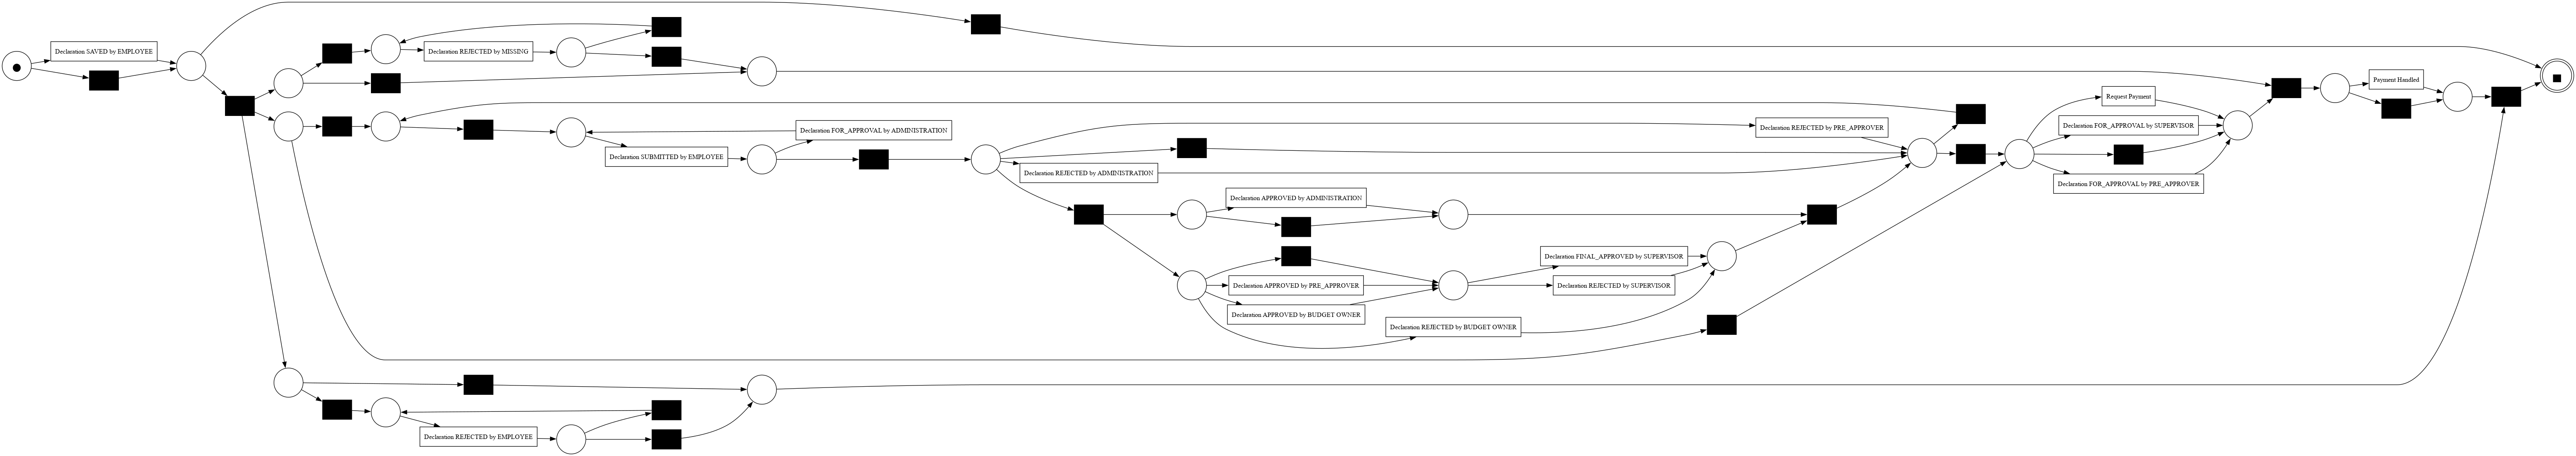

In [4]:
net, im, fm = pm4py.discover_petri_net_inductive(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

In [5]:
len(event_log['case:id'].unique())

10500

In [6]:
event_log['concept:name'].unique()

array(['Declaration SUBMITTED by EMPLOYEE',
       'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment',
       'Payment Handled', 'Declaration APPROVED by PRE_APPROVER',
       'Declaration REJECTED by MISSING',
       'Declaration REJECTED by PRE_APPROVER',
       'Declaration REJECTED by EMPLOYEE',
       'Declaration SAVED by EMPLOYEE',
       'Declaration REJECTED by SUPERVISOR',
       'Declaration APPROVED by ADMINISTRATION',
       'Declaration APPROVED by BUDGET OWNER',
       'Declaration FOR_APPROVAL by SUPERVISOR',
       'Declaration REJECTED by ADMINISTRATION',
       'Declaration FOR_APPROVAL by PRE_APPROVER',
       'Declaration REJECTED by BUDGET OWNER',
       'Declaration FOR_APPROVAL by ADMINISTRATION'], dtype=object)

In [7]:
event_log['case:BudgetNumber'].unique()

array(['budget 86566'], dtype=object)

In [8]:
print(len(event_log['case:DeclarationNumber'].unique()))
event_log['case:DeclarationNumber'].unique()

10049


array(['declaration number 86792', 'declaration number 86796',
       'declaration number 86801', ..., 'declaration number 138350',
       'declaration number 138355', 'declaration number 138360'],
      dtype=object)

In [9]:
event_log[event_log['case:concept:name'] == 'declaration 86791']

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205


In [10]:
start_end_event_log = TransformEventLog.start_end_event_log_next(event_log)

In [11]:
start_end_event_log

,id_start,org:resource_start,concept:name_start,time:timestamp_start,org:role_start,case:id_start,case:concept:name,case:BudgetNumber_start,case:DeclarationNumber_start,case:Amount_start,...,time:timestamp_complete,org:role_complete,case:id_complete,case:BudgetNumber_complete,case:DeclarationNumber_complete,case:Amount_complete,duration,duration_seconds,duration_ms,duration_hours
64523,dd_declaration 100000_19,SYSTEM,Request Payment,2018-02-09 12:42:49+00:00,UNDEFINED,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,...,2018-02-12 17:31:20+00:00,UNDEFINED,declaration 100000,budget 86566,declaration number 100001,600.844121,3 days 04:48:31,276511.0,276511000.0,76.808611
64573,dd_declaration 100005_19,SYSTEM,Request Payment,2018-01-31 12:45:18+00:00,UNDEFINED,declaration 100005,declaration 100005,budget 86566,declaration number 100006,35.133685,...,2018-02-01 17:31:17+00:00,UNDEFINED,declaration 100005,budget 86566,declaration number 100006,35.133685,1 days 04:45:59,103559.0,103559000.0,28.766389
64704,dd_declaration 100010_19,SYSTEM,Request Payment,2018-01-31 12:45:13+00:00,UNDEFINED,declaration 100010,declaration 100010,budget 86566,declaration number 100011,26.190565,...,2018-02-01 17:31:17+00:00,UNDEFINED,declaration 100010,budget 86566,declaration number 100011,26.190565,1 days 04:46:04,103564.0,103564000.0,28.767778
65193,dd_declaration 100015_19,SYSTEM,Request Payment,2018-02-02 08:22:46+00:00,UNDEFINED,declaration 100015,declaration 100015,budget 86566,declaration number 100016,82.951298,...,2018-02-05 17:31:02+00:00,UNDEFINED,declaration 100015,budget 86566,declaration number 100016,82.951298,3 days 09:08:16,292096.0,292096000.0,81.137778
65879,dd_declaration 100021_19,SYSTEM,Request Payment,2018-02-08 12:15:26+00:00,UNDEFINED,declaration 100021,declaration 100021,budget 86566,declaration number 100022,6.695786,...,2018-02-12 17:31:20+00:00,UNDEFINED,declaration 100021,budget 86566,declaration number 100022,6.695786,4 days 05:15:54,364554.0,364554000.0,101.265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64260,st_step 99993_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-01-29 19:35:35+00:00,EMPLOYEE,declaration 99989,declaration 99989,budget 86566,declaration number 99990,67.609244,...,2018-01-29 19:39:29+00:00,ADMINISTRATION,declaration 99989,budget 86566,declaration number 99990,67.609244,0 days 00:03:54,234.0,234000.0,0.065000
64274,st_step 99994_0,STAFF MEMBER,Declaration APPROVED by BUDGET OWNER,2018-01-31 14:13:43+00:00,BUDGET OWNER,declaration 99989,declaration 99989,budget 86566,declaration number 99990,67.609244,...,2018-02-01 10:56:10+00:00,SUPERVISOR,declaration 99989,budget 86566,declaration number 99990,67.609244,0 days 20:42:27,74547.0,74547000.0,20.707500
64333,st_step 99997_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-01-29 20:58:58+00:00,EMPLOYEE,declaration 99995,declaration 99995,budget 86566,declaration number 99996,26.218933,...,2018-01-29 20:59:09+00:00,ADMINISTRATION,declaration 99995,budget 86566,declaration number 99996,26.218933,0 days 00:00:11,11.0,11000.0,0.003056
64339,st_step 99998_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-01-29 20:59:09+00:00,ADMINISTRATION,declaration 99995,declaration 99995,budget 86566,declaration number 99996,26.218933,...,2018-01-30 13:58:38+00:00,SUPERVISOR,declaration 99995,budget 86566,declaration number 99996,26.218933,0 days 16:59:29,61169.0,61169000.0,16.991389


In [12]:
start_end_event_log = TransformEventLog.seconds_in_day(start_end_event_log, 'time:timestamp_start')
start_end_event_log = TransformEventLog.day_of_week(start_end_event_log, 'time:timestamp_start')

In [36]:
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'concept:name_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'id_start')

                                                                                                                                 id_start_first  \
case:concept:name  concept:name_start_first                 time:timestamp_start_first concept:name_start_second                                  
declaration 100000 Declaration APPROVED by ADMINISTRATION   2018-02-07 09:58:46+00:00  Declaration APPROVED by ADMINISTRATION                 1   
                                                                                       Declaration SUBMITTED by EMPLOYEE                      1   
                   Declaration FINAL_APPROVED by SUPERVISOR 2018-02-08 10:59:05+00:00  Declaration APPROVED by ADMINISTRATION                 1   
                                                                                       Declaration FINAL_APPROVED by SUPERVISOR               1   
                                                                                       Declaration SUBMITTED by EMPLOY

In [ ]:
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'org:resource_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'id_start')

In [35]:
start_end_event_log

,id_start,org:resource_start,concept:name_start,time:timestamp_start,org:role_start,case:id_start,case:concept:name,case:BudgetNumber_start,case:DeclarationNumber_start,case:Amount_start,...,Declaration REJECTED by ADMINISTRATION_right,Declaration REJECTED by BUDGET OWNER_right,Declaration REJECTED by EMPLOYEE_right,Declaration REJECTED by MISSING_right,Declaration REJECTED by PRE_APPROVER_right,Declaration REJECTED by SUPERVISOR_right,Declaration SAVED by EMPLOYEE_right,Declaration SUBMITTED by EMPLOYEE_right,Payment Handled_right,Request Payment_right
0,dd_declaration 100000_19,SYSTEM,Request Payment,2018-02-09 12:42:49+00:00,UNDEFINED,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,...,0,0,0,0,0,0,0,1,0,1
1,dd_declaration 100005_19,SYSTEM,Request Payment,2018-01-31 12:45:18+00:00,UNDEFINED,declaration 100005,declaration 100005,budget 86566,declaration number 100006,35.133685,...,0,0,0,0,0,0,0,1,0,1
2,dd_declaration 100010_19,SYSTEM,Request Payment,2018-01-31 12:45:13+00:00,UNDEFINED,declaration 100010,declaration 100010,budget 86566,declaration number 100011,26.190565,...,0,0,0,0,0,0,0,1,0,1
3,dd_declaration 100015_19,SYSTEM,Request Payment,2018-02-02 08:22:46+00:00,UNDEFINED,declaration 100015,declaration 100015,budget 86566,declaration number 100016,82.951298,...,0,0,0,0,0,0,0,1,0,1
4,dd_declaration 100021_19,SYSTEM,Request Payment,2018-02-08 12:15:26+00:00,UNDEFINED,declaration 100021,declaration 100021,budget 86566,declaration number 100022,6.695786,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45932,st_step 99993_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-01-29 19:35:35+00:00,EMPLOYEE,declaration 99989,declaration 99989,budget 86566,declaration number 99990,67.609244,...,0,0,0,0,0,0,0,1,0,0
45933,st_step 99994_0,STAFF MEMBER,Declaration APPROVED by BUDGET OWNER,2018-01-31 14:13:43+00:00,BUDGET OWNER,declaration 99989,declaration 99989,budget 86566,declaration number 99990,67.609244,...,0,0,0,0,0,0,0,1,0,0
45934,st_step 99997_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-01-29 20:58:58+00:00,EMPLOYEE,declaration 99995,declaration 99995,budget 86566,declaration number 99996,26.218933,...,0,0,0,0,0,0,0,1,0,0
45935,st_step 99998_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-01-29 20:59:09+00:00,ADMINISTRATION,declaration 99995,declaration 99995,budget 86566,declaration number 99996,26.218933,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
start_end_event_log.to_csv('../transformed_event_logs/BPIC_2020_DD_start_end.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
start_end_event_log.to_pickle('../transformed_event_logs/BPIC_2020_DD_start_end.pickle')